<a href="https://colab.research.google.com/github/fca-koki-maeda/news-classifier-app/blob/main/news-classifier-app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
# Livedoorニュースのファイルをダウンロード
!wget https://www.rondhuit.com/download/ldcc-20140209.tar.gz

--2025-10-11 06:25:51--  https://www.rondhuit.com/download/ldcc-20140209.tar.gz
Resolving www.rondhuit.com (www.rondhuit.com)... 59.106.19.174
Connecting to www.rondhuit.com (www.rondhuit.com)|59.106.19.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8855190 (8.4M) [application/x-gzip]
Saving to: ‘ldcc-20140209.tar.gz’

ldcc-20140209.tar.g 100%[===================>]   8.44M  1.89MB/s    in 6.0s    

2025-10-11 06:25:58 (1.41 MB/s) - ‘ldcc-20140209.tar.gz’ saved [8855190/8855190]



In [ ]:
# @title
# =============================
# Livedoorニュースコーパス分類アプリ
# =============================

import os
import tarfile
import urllib.request
import glob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import joblib

# -----------------------------
# 1. データのダウンロードと展開
# -----------------------------
url = "https://www.rondhuit.com/download/ldcc-20140209.tar.gz"
dataset_dir = "livedoor_news"

if not os.path.exists(dataset_dir):
    print("📦 Livedoorニュースコーパスをダウンロード中...")
    urllib.request.urlretrieve(url, "ldcc-20140209.tar.gz")
    with tarfile.open("ldcc-20140209.tar.gz", "r:gz") as tar:
        tar.extractall()
    os.rename("text", dataset_dir)
    print("✅ ダウンロード完了！")

# -----------------------------
# 2. データの読み込み
# -----------------------------
categories = [
    "topic-news", "sports-watch", "it-life-hack", "movie-enter",
    "peachy", "kaden-channel", "dokujo-tsushin", "livedoor-homme", "scoopie"
]

texts, labels = [], []

for i, cat in enumerate(categories):
    files = glob.glob(f"{dataset_dir}/{cat}/*.txt")
    for file in files:
        with open(file, encoding="utf-8") as f:
            lines = f.readlines()[2:]  # 最初の2行はメタデータ
            text = "".join(lines).strip()
            texts.append(text)
            labels.append(cat)

print(f"📂 読み込み完了: 記事数 {len(texts)}")

# -----------------------------
# 3. 学習データの作成とモデル学習
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20000, stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

print("🤖 学習中...")
model.fit(X_train, y_train)
print("✅ 学習完了！")

# -----------------------------
# 4. 精度確認
# -----------------------------
y_pred = model.predict(X_test)
print(f"🔍 正解率: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred, labels=categories, target_names=categories, zero_division=0))

# -----------------------------
# 5. モデル保存
# -----------------------------
joblib.dump(model, "livedoor_model.pkl")
print("💾 モデルを保存しました。")

# -----------------------------
# 6. ユーザー入力 → ジャンル分類
# -----------------------------
def classify_article(text):
    model = joblib.load("livedoor_model.pkl")
    pred = model.predict([text])[0]
    return pred

print("\n📰 ニュース記事を入力してください（終了するには空欄でEnter）")
while True:
    user_input = input("記事本文：")
    if user_input.strip() == "":
        print("終了します。")
        break
    result = classify_article(user_input)
    print(f"→ 判定結果: {result}\n")


📂 読み込み完了: 記事数 6505
🤖 学習中...
✅ 学習完了！
🔍 正解率: 0.906
                precision    recall  f1-score   support

    topic-news       0.96      0.92      0.94       178
  sports-watch       0.95      0.97      0.96       178
  it-life-hack       0.96      0.94      0.95       180
   movie-enter       0.91      0.97      0.94       189
        peachy       0.65      0.89      0.76       142
 kaden-channel       1.00      0.96      0.98       158
dokujo-tsushin       0.92      0.85      0.88       163
livedoor-homme       0.96      0.66      0.79       113
       scoopie       0.00      0.00      0.00         0

      accuracy                           0.91      1301
     macro avg       0.81      0.80      0.80      1301
  weighted avg       0.92      0.91      0.91      1301

💾 モデルを保存しました。

📰 ニュース記事を入力してください（終了するには空欄でEnter）


KeyboardInterrupt: Interrupted by user

起動中です。
読み込み完了しました。
記事数: 5150
学習中です。
学習完了しました。
正解率: 0.968
               precision    recall  f1-score   support

   topic-news       0.97      0.91      0.94       172
 sports-watch       0.95      0.98      0.96       173
 it-life-hack       0.97      0.97      0.97       173
  movie-enter       0.94      0.98      0.96       171
kaden-channel       1.00      0.97      0.99       170
         smax       0.98      1.00      0.99       171

     accuracy                           0.97      1030
    macro avg       0.97      0.97      0.97      1030
 weighted avg       0.97      0.97      0.97      1030

モデルを保存しました。


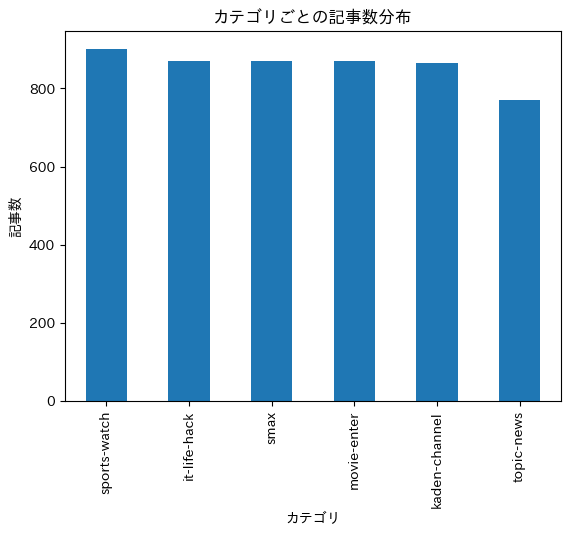

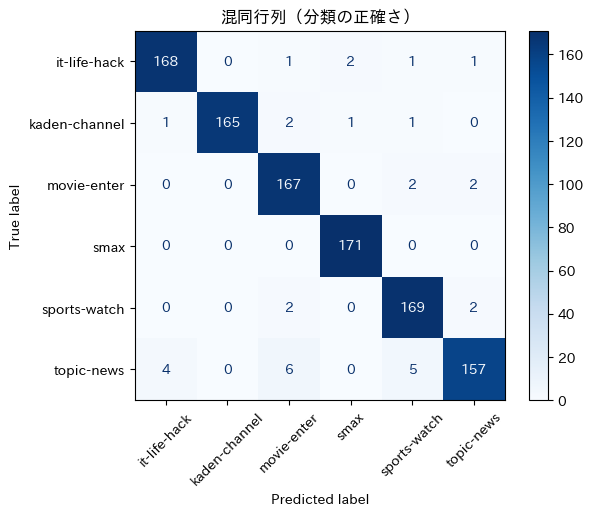

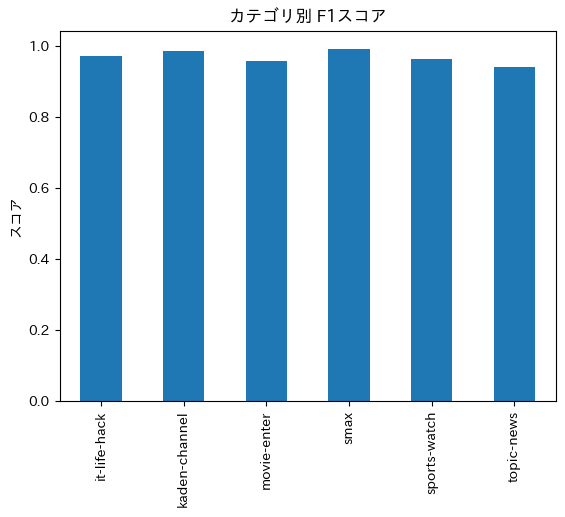

In [11]:
# ライブラリインストール
!pip install ipywidgets --quiet
!pip install japanize-matplotlib

import os
import tarfile
import urllib.request
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import joblib
from ipywidgets import Textarea, Button, Output, VBox
from IPython.display import display


# ダウンロードと展開

print("起動中です。")

url = "https://www.rondhuit.com/download/ldcc-20140209.tar.gz"
dataset_dir = "livedoor_news"

if not os.path.exists(dataset_dir):
    print("Livedoorニュースコーパスをダウンロード中です。")
    urllib.request.urlretrieve(url, "ldcc-20140209.tar.gz")
    with tarfile.open("ldcc-20140209.tar.gz", "r:gz") as tar:
        tar.extractall()
    os.rename("text", dataset_dir)
    print("ダウンロード完了しました。")


# データの読み込み

categories = [
    "topic-news", "sports-watch", "it-life-hack", "movie-enter",
    "kaden-channel", "smax"
]

categories_jp = {
    "topic-news": "トピックス（時事・社会・政治経済）",
    "sports-watch": "スポーツ",
    "it-life-hack": "IT・ライフハック",
    "movie-enter": "映画・俳優・芸能エンタメ",
    "kaden-channel": "家電・ガジェット",
    "dokujo-tsushin": "女性向けライフスタイル・コラム・恋愛", # 除外
    "livedoor-homme": "男性向けライフスタイル・ファッション・ビジネス", # 除外
    "peachy":"女性向けトレンド・恋愛・美容・ファッション", # 除外
    "smax": "スマホ・通信・キャリア"
}

texts, labels = [], []

for cat in categories:
    files = glob.glob(f"{dataset_dir}/{cat}/*.txt")
    for file in files:
        if file.endswith("README.txt"):
            continue
        with open(file, encoding="utf-8") as f:
            lines = f.readlines()[2:]
            text = "".join(lines).strip()
            if text:
                texts.append(text)
                labels.append(cat)

print(f"読み込み完了しました。")
print(f"記事数: {len(texts)}")


# 学習データ作成とモデル学習

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20000, stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000)) ])

print("学習中です。")
model.fit(X_train, y_train)
print("学習完了しました。")


# 精度確認
y_pred = model.predict(X_test)
print(f"正解率: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred, labels=categories, target_names=categories, zero_division=0))


# モデル保存
joblib.dump(model, "livedoor_model.pkl")
print("モデルを保存しました。")


# 入力フォーム
text_input = Textarea(
    value='',
    placeholder='ここにニュース記事本文を入力してください。',
    description='記事本文:',
    layout={'width': '800px', 'height': '200px'}
)


# 判定ボタン
button = Button(description="ジャンル分類")
out = Output()


# ボタン押下時の処理
def on_button_clicked(b):
    with out:
        out.clear_output()
        text = text_input.value
        if not text.strip():
            print("記事が入力されていません")
            return

        # 予測カテゴリと確率を取得
        proba = model.predict_proba([text])[0]
        pred_idx = proba.argmax()
        pred = model.classes_[pred_idx]
        confidence = proba[pred_idx]

        # 日本語名に変換
        pred_jp = categories_jp.get(pred, "不明なカテゴリ")

        # 結果を表示
        print(f"判定結果: {pred_jp}（{pred}）")
        print(f"確信度: {confidence:.2%}")

        # 上位3カテゴリを表示
        proba = model.predict_proba([text])[0]
        top3 = np.argsort(proba)[::-1][:3]
        print("\n上位3カテゴリ:")
        for i in top3:
            cat = model.classes_[i]
            print(f"{categories_jp[cat]}（{cat}）: {proba[i]:.2%}")

button.on_click(on_button_clicked)


# フォーム表示
display(VBox([text_input, button, out]))


# カテゴリごとの件数
category_counts = pd.Series(labels).value_counts()

category_counts.plot(kind='bar')
plt.title("カテゴリごとの記事数分布")
plt.xlabel("カテゴリ")
plt.ylabel("記事数")
plt.show()


# 混同行列の表示
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', xticks_rotation=45)
plt.title("混同行列（分類の正確さ）")
plt.show()


# 各カテゴリごとのF1スコア棒グラフ
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

df[:-3].plot(kind='bar', y='f1-score', legend=False)
plt.title("カテゴリ別 F1スコア")
plt.ylabel("スコア")
plt.show()
